Name: Heart Disease Indicators  

DATASET: https://www.kaggle.com/datasets/bhaveshmisra/heart-disease-indicators

# **Модуль 1**

### Подготовка данных

In [ ]:
#Подключение Google диск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Подключение библиотек
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
# matplotlib Inline позволяет выводить график в каждой отдельной ячейке для всего ноутбука
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sbn
import sklearn
from sklearn.datasets import load_diabetes

In [ ]:
# Чтение файла из Google диск
df1 = pd.read_csv('/content/drive/MyDrive/МашОбуч/heart_disease_health_indicators.csv', sep = ',') #Чтение файла csv через разделитель ","
# Представление данных датасета
#df1
df1.head() # Вывод первых 5 строк
#df1.tail() # Вывод последних 5 строк
#df1.shape # Вывод количества строк и столбцов

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
# Выбираем только нужные столбцы из DataSet
df = df1[['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'BMI','Stroke','Diabetes',
          'PhysActivity','Fruits','Veggies','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age']]
df

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Stroke,Diabetes,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0,1,1,40,0,0,0,0,1,5,18,15,1,0,9
1,0,0,0,25,0,0,1,0,0,3,0,0,0,0,7
2,0,1,1,28,0,0,0,1,0,5,30,30,1,0,9
3,0,1,0,27,0,0,1,1,1,2,0,0,0,0,11
4,0,1,1,24,0,0,1,1,1,2,3,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253656,0,0,0,25,0,0,1,1,1,1,0,0,0,0,4
253657,0,0,1,24,0,0,0,0,1,3,0,0,0,0,7
253658,0,0,0,27,0,0,1,0,0,2,0,0,0,0,3
253659,0,0,1,37,0,2,0,0,1,4,0,0,0,0,6


In [ ]:
# Удаление выбросов для BMI
# IQR (межквартильный диапазон) - межквартильный подход к поиску выбросов
# Обнаружение IQR
# Рассчет верхнего и нижнего предела
Q1 = np.percentile(df['BMI'], 25, method='midpoint')
Q3 = np.percentile(df['BMI'], 75, method='midpoint')
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print("Old Shape: ", df.shape)
# Создание массивов логических значений, указывающих строки выбросов
upper_arrayo = np.where(df['BMI']>=upper)[0]
lower_arrayo = np.where(df['BMI']<=lower)[0]
# Удаление выбросов
df.drop(index=upper_arrayo, inplace=True)
df.drop(index=lower_arrayo, inplace=True)
# Вывод данных после удаления выборосов
print("New Shape: ", df.shape)

Old Shape:  (253661, 15)
New Shape:  (243816, 15)


<ipython-input-7-30bdfe874369>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=upper_arrayo, inplace=True)
<ipython-input-7-30bdfe874369>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=lower_arrayo, inplace=True)


In [ ]:
# Добавление пропусков в датасет
percentage = 5 # Определение процента строк для создания пропусков
columns = ['Fruits', 'Veggies', 'GenHlth'] # Определение столбцов для создания пропусков
linesWithGaps = int(len(df) * (percentage / 100)) # Вычисление числа строк датасета для создания пропусков

for _ in range(linesWithGaps):
  randomLine = np.random.randint(0, len(df))
  randomColumn = np.random.choice(columns)
  df.at[randomLine, randomColumn] = np.nan # Выбраны случайные строки и столбцы для создания пропусков

In [ ]:
#Информация о количестве пропусков
df.isna().sum() #Вывод количества пропусков

HeartDiseaseorAttack       0
HighBP                     0
HighChol                   0
BMI                        0
Stroke                     0
Diabetes                   0
PhysActivity               0
Fruits                  2635
Veggies                 2555
GenHlth                 2627
MentHlth                   0
PhysHlth                   0
DiffWalk                   0
Sex                        0
Age                        0
dtype: int64

In [ ]:
df.shape #Вывод данных до удаления пропусков

(249612, 15)

In [ ]:
# Удаление пропусков из датасета
df = df.dropna() #Удаление пропусков
df.shape #Вывод данных после удаления пропусков

(249612, 15)

In [ ]:
# Информация о Датасете
#df.info() # краткое описание датасета
df.dtypes # типы столбцов

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
BMI                     float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
dtype: object

In [ ]:
# Вывод количества дубликатов (строк)
print("Actual shape:", df.shape)
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows_df.shape)

Actual shape: (150153, 15)
Number of duplicate rows: (0, 15)


In [ ]:
# Удаление дубликатов (строк) из датасета
df = df.drop_duplicates() # Удаление дубликатов
df.shape # Количество данных после удаления дубликатов

(150153, 15)

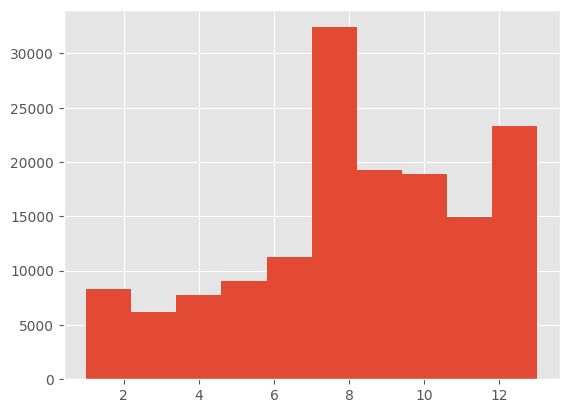

In [ ]:
# Построение гистограммы
# Гистограмма это график, который показывает частоту распределения по признаку
# Гистограмма распределения количества людей по их возрасту
df['Age'].hist();

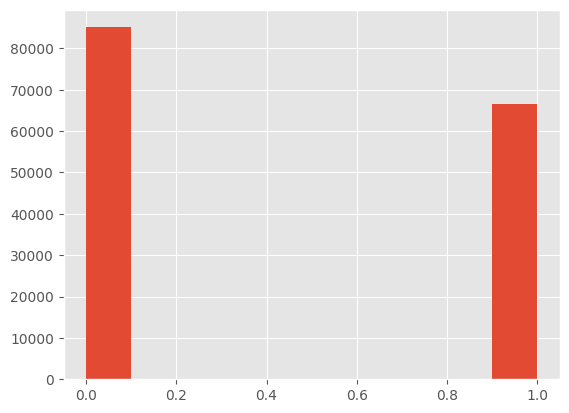

In [ ]:
# Гисторамма распределения количества женщин и мужчин в датасете
df['Sex'].hist();

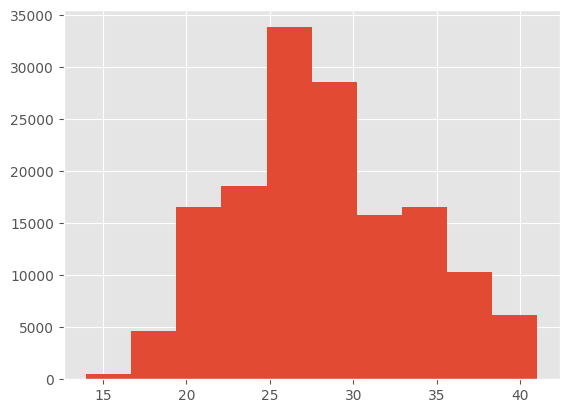

In [ ]:
# Гистограмма распределения количества людей по весу
df['BMI'].hist();

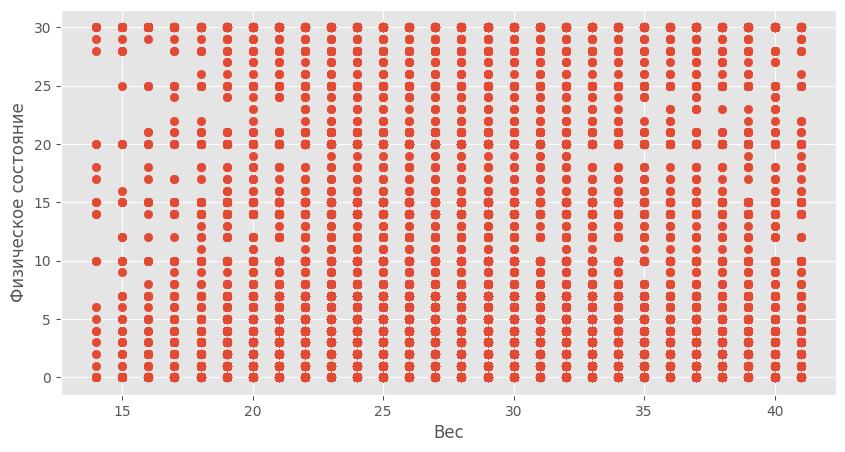

In [ ]:
# Построение диаграммы рассеяния
# Графическое представления данных, используемый для выявления возможных, не имеющих строго функционального характера взаимосвязей между количественными переменными (предварительные выводы о наличии или отсутствии связи между переменными)
# Диаграмма рассеяния зависимости веса и физического состояния
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(x = df['BMI'], y = df['PhysHlth'])
plt.xlabel("Вес")
plt.ylabel("Физическое состояние")
plt.show()

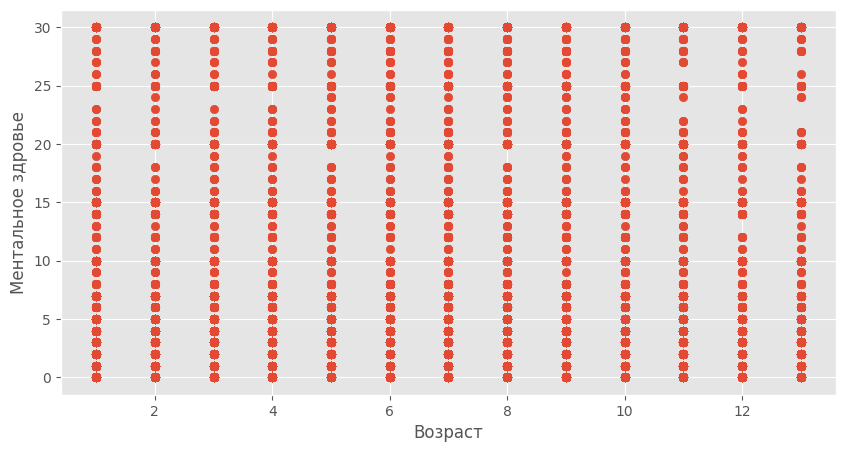

In [ ]:
# Диаграмма рассеяния зависимости возраста и ментального состояния
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(x = df['Age'], y = df['MentHlth'])
plt.xlabel("Возраст")
plt.ylabel("Ментальное здровье")
plt.show()

<Axes: xlabel='Age'>

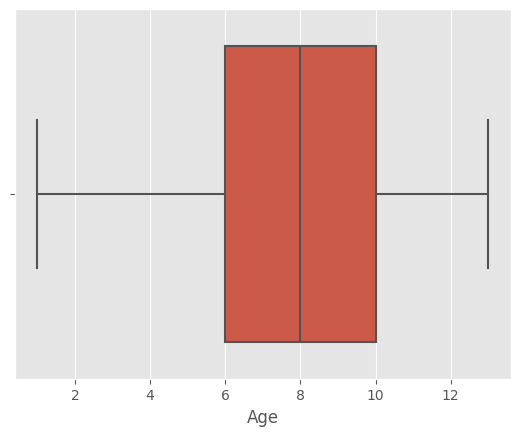

In [ ]:
# Построение ящика с усами
# Эта диаграмма способ показать распределение данных в наборе(в данном случае возраст людей). Медиана и промежуток в который укладываются большинство(усы с двух сторон). Усы показывают что наименьшее значение это возраст со значением 1, а наибольшее значение, т.е. самый старый человек 13 лет.
# Размах = 13-1 = 12. Все данные лежат в диапазоне от 1 до 13 (включая 1 и 13 лет)
# Границы ящика - медиана каждой половины (4 равные половины данных)
sbn.boxplot(x=df['Age']) # Ящик с усами для возраста

<Axes: xlabel='GenHlth'>

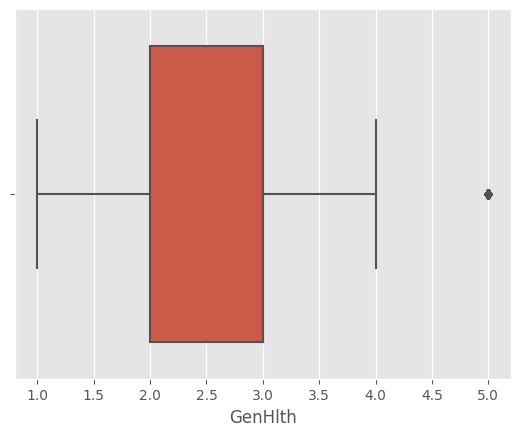

In [ ]:
# Построение ящика с усами для общей оценки состояния здоровья
sbn.boxplot(x=df['GenHlth'])

<Axes: xlabel='BMI'>

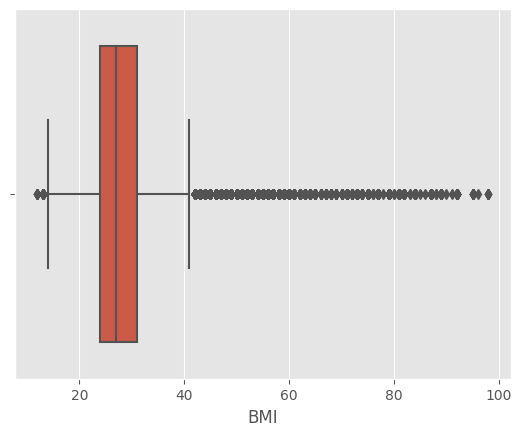

In [ ]:
# Построение ящика с усами для веса
sbn.boxplot(x=df['BMI'])
# Выбросы могут быть вызваны неопределенностью измерения или экспериментальной ошибкой.
# Выбросы в данных могут испортить и обмануть процесс обучения моделей машинного обучения, что приведет к получению менее точных моделей и, в конечном итоге, к снижению производительности.

<Axes: xlabel='BMI'>

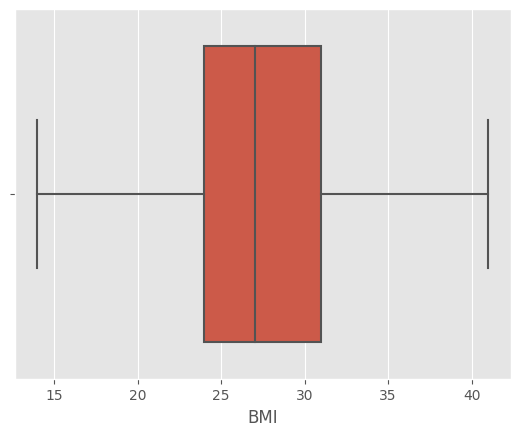

In [ ]:
# Построение ящика с усами для веса после удаления выбросов
sbn.boxplot(x=df['BMI'])

In [ ]:
# Нормализация данных с помощью Scikit-Learn
# Нормализация - техника преобразования значений признака (Feature), масштабирующая значения таким образом, что они располагаются в диапазоне от 0 до 1
scaler = MinMaxScaler() # метод масштабирования значений, в диапазоне от 0 до 1
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns) # fit_transform преобразовывает данные, columns=df.columns гарантирует, что имена столбцов будут восстановлены
df=df_normalized
df

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Stroke,Diabetes,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,0.962963,0.0,0.0,0.0,0.0,1.0,1.00,0.6,0.500000,1.0,0.0,0.666667
1,0.0,0.0,0.0,0.407407,0.0,0.0,1.0,0.0,0.0,0.50,0.0,0.000000,0.0,0.0,0.500000
2,0.0,1.0,1.0,0.518519,0.0,0.0,0.0,1.0,0.0,1.00,1.0,1.000000,1.0,0.0,0.666667
3,0.0,1.0,0.0,0.481481,0.0,0.0,1.0,1.0,1.0,0.25,0.0,0.000000,0.0,0.0,0.833333
4,0.0,1.0,1.0,0.370370,0.0,0.0,1.0,1.0,1.0,0.25,0.1,0.000000,0.0,0.0,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157841,0.0,1.0,0.0,0.481481,0.0,0.0,1.0,0.0,0.0,0.75,0.0,0.000000,0.0,0.0,0.333333
157842,0.0,0.0,1.0,0.481481,0.0,1.0,1.0,1.0,0.0,0.75,0.0,1.000000,0.0,1.0,0.833333
157843,0.0,0.0,0.0,0.703704,0.0,0.0,0.0,1.0,1.0,0.75,0.0,0.500000,0.0,1.0,0.750000
157844,0.0,0.0,1.0,0.851852,0.0,1.0,0.0,0.0,1.0,0.75,0.0,0.000000,0.0,0.0,0.416667


In [ ]:
# Построение матрицы корреляций
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Stroke,Diabetes,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
HeartDiseaseorAttack,1.000000,0.192530,0.166074,0.027204,0.188085,0.151986,-0.047244,0.009892,-0.006148,0.224465,0.012753,0.134639,0.176976,0.098540,0.244272
HighBP,0.192530,1.000000,0.251321,0.188550,0.123792,0.240708,-0.082275,-0.006558,-0.026936,0.233232,0.000392,0.114027,0.188918,0.051000,0.327050
HighChol,0.166074,0.251321,1.000000,0.096200,0.084323,0.185811,-0.045431,-0.016979,-0.012835,0.156893,0.023885,0.084641,0.116940,0.021542,0.239795
BMI,0.027204,0.188550,0.096200,1.000000,-0.007825,0.197269,-0.085101,-0.050032,-0.024793,0.135768,0.008691,0.029036,0.116057,0.058100,-0.020524
Stroke,0.188085,0.123792,0.084323,-0.007825,1.000000,0.083412,-0.037458,0.009752,-0.014910,0.150749,0.029001,0.109438,0.148207,0.008448,0.145386
Diabetes,0.151986,0.240708,0.185811,0.197269,0.083412,1.000000,-0.064359,-0.004769,-0.019285,0.236651,0.003527,0.103146,0.158700,0.044406,0.201087
PhysActivity,-0.047244,-0.082275,-0.045431,-0.085101,-0.037458,-0.064359,1.000000,0.104521,0.111089,-0.192007,-0.058777,-0.151948,-0.194329,0.035755,-0.098467
Fruits,0.009892,-0.006558,-0.016979,-0.050032,0.009752,-0.004769,0.104521,1.000000,0.224568,-0.037503,-0.031669,0.008121,-0.001909,-0.077161,0.072454
Veggies,-0.006148,-0.026936,-0.012835,-0.024793,-0.014910,-0.019285,0.111089,0.224568,1.000000,-0.053321,-0.005884,-0.002066,-0.027221,-0.062694,-0.006510
GenHlth,0.224465,0.233232,0.156893,0.135768,0.150749,0.236651,-0.192007,-0.037503,-0.053321,1.000000,0.234995,0.495721,0.415957,-0.010015,0.160686


In [ ]:
# Информация о Датасете
df.info() # краткое описание датасета

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150140 entries, 0 to 157845
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  150140 non-null  float64
 1   HighBP                150140 non-null  float64
 2   HighChol              150140 non-null  float64
 3   BMI                   150140 non-null  float64
 4   Stroke                150140 non-null  float64
 5   Diabetes              150140 non-null  float64
 6   PhysActivity          150140 non-null  float64
 7   Fruits                150140 non-null  float64
 8   Veggies               150140 non-null  float64
 9   GenHlth               150140 non-null  float64
 10  MentHlth              150140 non-null  float64
 11  PhysHlth              150140 non-null  float64
 12  DiffWalk              150140 non-null  float64
 13  Sex                   150140 non-null  float64
 14  Age                   150140 non-null  float64
dtype

# **Модуль 2**

### Подготовка и нормализация данных датасета из М-1

In [ ]:
#Подключение Google диск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Подключение библиотек
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
# matplotlib Inline позволяет выводить график в каждой отдельной ячейке для всего ноутбука
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sbn
import sklearn
from sklearn.datasets import load_diabetes

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/МашОбуч/heart_disease_health_indicators.csv', sep = ',') #Чтение файла csv через разделитель ","
# Представление данных датасета
#df1

In [ ]:
df = df1[['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'BMI','Stroke','Diabetes',
          'PhysActivity','Fruits','Veggies','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age']]
df

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Stroke,Diabetes,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0,1,1,40,0,0,0,0,1,5,18,15,1,0,9
1,0,0,0,25,0,0,1,0,0,3,0,0,0,0,7
2,0,1,1,28,0,0,0,1,0,5,30,30,1,0,9
3,0,1,0,27,0,0,1,1,1,2,0,0,0,0,11
4,0,1,1,24,0,0,1,1,1,2,3,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253656,0,0,0,25,0,0,1,1,1,1,0,0,0,0,4
253657,0,0,1,24,0,0,0,0,1,3,0,0,0,0,7
253658,0,0,0,27,0,0,1,0,0,2,0,0,0,0,3
253659,0,0,1,37,0,2,0,0,1,4,0,0,0,0,6


<Axes: xlabel='BMI'>

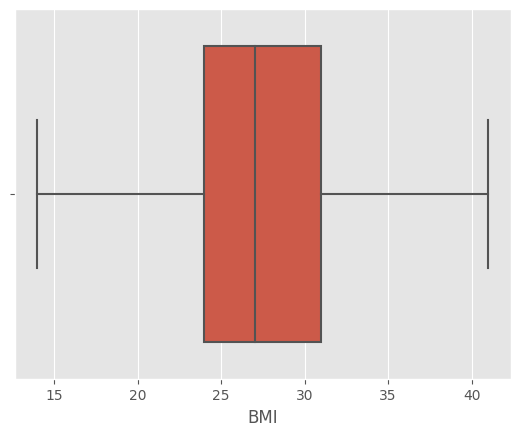

In [ ]:
# Построение ящика с усами для веса для проверки выбросов
sbn.boxplot(x=df['BMI'])

In [ ]:
# Удаление выбросов для BMI
# IQR (межквартильный диапазон) - межквартильный подход к поиску выбросов
# Обнаружение IQR
# Рассчет верхнего и нижнего предела
Q1 = np.percentile(df['BMI'], 25, method='midpoint')
Q3 = np.percentile(df['BMI'], 75, method='midpoint')
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print("Old Shape: ", df.shape)
# Создание массивов логических значений, указывающих строки выбросов
upper_arrayo = np.where(df['BMI']>=upper)[0]
lower_arrayo = np.where(df['BMI']<=lower)[0]
# Удаление выбросов
df.drop(index=upper_arrayo, inplace=True)
df.drop(index=lower_arrayo, inplace=True)
# Вывод данных после удаления выборосов
print("New Shape: ", df.shape)

In [ ]:
# Удаление дубликатов (строк) из датасета
df = df.drop_duplicates() # Удаление дубликатов
df.shape # Количество данных после удаления дубликатов

(157846, 15)

In [ ]:
# Нормализация данных с помощью Scikit-Learn
# Нормализация - техника преобразования значений признака (Feature), масштабирующая значения таким образом, что они располагаются в диапазоне от 0 до 1
scaler = MinMaxScaler() # метод масштабирования значений, в диапазоне от 0 до 1
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns) # fit_transform преобразовывает данные, columns=df.columns гарантирует, что имена столбцов будут восстановлены
df=df_normalized
df

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Stroke,Diabetes,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,0.962963,0.0,0.0,0.0,0.0,1.0,1.00,0.6,0.500000,1.0,0.0,0.666667
1,0.0,0.0,0.0,0.407407,0.0,0.0,1.0,0.0,0.0,0.50,0.0,0.000000,0.0,0.0,0.500000
2,0.0,1.0,1.0,0.518519,0.0,0.0,0.0,1.0,0.0,1.00,1.0,1.000000,1.0,0.0,0.666667
3,0.0,1.0,0.0,0.481481,0.0,0.0,1.0,1.0,1.0,0.25,0.0,0.000000,0.0,0.0,0.833333
4,0.0,1.0,1.0,0.370370,0.0,0.0,1.0,1.0,1.0,0.25,0.1,0.000000,0.0,0.0,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157841,0.0,1.0,0.0,0.481481,0.0,0.0,1.0,0.0,0.0,0.75,0.0,0.000000,0.0,0.0,0.333333
157842,0.0,0.0,1.0,0.481481,0.0,1.0,1.0,1.0,0.0,0.75,0.0,1.000000,0.0,1.0,0.833333
157843,0.0,0.0,0.0,0.703704,0.0,0.0,0.0,1.0,1.0,0.75,0.0,0.500000,0.0,1.0,0.750000
157844,0.0,0.0,1.0,0.851852,0.0,1.0,0.0,0.0,1.0,0.75,0.0,0.000000,0.0,0.0,0.416667


In [ ]:
# Добавление пропусков в датасет
percentage = 5 # Определение процента строк для создания пропусков
columns = ['Fruits', 'Veggies', 'GenHlth'] # Определение столбцов для создания пропусков
linesWithGaps = int(len(df) * (percentage / 100)) # Вычисление числа строк датасета для создания пропусков

for _ in range(linesWithGaps):
  randomLine = np.random.randint(0, len(df))
  randomColumn = np.random.choice(columns)
  df.at[randomLine, randomColumn] = np.nan # Выбраны случайные строки и столбцы для создания пропусков

In [ ]:
#Информация о количестве пропусков
df.isna().sum() #Вывод количества пропусков

HeartDiseaseorAttack       0
HighBP                     0
HighChol                   0
BMI                        0
Stroke                     0
Diabetes                   0
PhysActivity               0
Fruits                  2605
Veggies                 2611
GenHlth                 2607
MentHlth                   0
PhysHlth                   0
DiffWalk                   0
Sex                        0
Age                        0
dtype: int64

In [ ]:
df.shape #Вывод данных до удаления пропусков

(157846, 15)

In [ ]:
# Удаление пропусков из датасета
df = df.dropna() #Удаление пропусков
df.shape #Вывод данных после удаления пропусков

(150162, 15)

Сохранение преобразованного датасета:

In [ ]:
df.to_csv('/content/drive/MyDrive/МашОбуч/out.csv')

### Балансировка групп

In [ ]:
#Подключение Google диск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Подключение библиотек
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/МашОбуч/out.csv', sep = ',')
df=df.drop("Unnamed: 0", axis=1)
df

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Stroke,Diabetes,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,0.962963,0.0,0.0,0.0,0.0,1.0,1.00,0.6,0.500000,1.0,0.0,0.666667
1,0.0,0.0,0.0,0.407407,0.0,0.0,1.0,0.0,0.0,0.50,0.0,0.000000,0.0,0.0,0.500000
2,0.0,1.0,0.0,0.481481,0.0,0.0,1.0,1.0,1.0,0.25,0.0,0.000000,0.0,0.0,0.833333
3,0.0,1.0,1.0,0.370370,0.0,0.0,1.0,1.0,1.0,0.25,0.1,0.000000,0.0,0.0,0.833333
4,0.0,1.0,1.0,0.407407,0.0,0.0,1.0,1.0,1.0,0.25,0.0,0.066667,0.0,1.0,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150157,0.0,1.0,0.0,0.481481,0.0,0.0,1.0,0.0,0.0,0.75,0.0,0.000000,0.0,0.0,0.333333
150158,0.0,0.0,1.0,0.481481,0.0,1.0,1.0,1.0,0.0,0.75,0.0,1.000000,0.0,1.0,0.833333
150159,0.0,0.0,0.0,0.703704,0.0,0.0,0.0,1.0,1.0,0.75,0.0,0.500000,0.0,1.0,0.750000
150160,0.0,0.0,1.0,0.851852,0.0,1.0,0.0,0.0,1.0,0.75,0.0,0.000000,0.0,0.0,0.416667


In [ ]:
#Распределение классов
df['HeartDiseaseorAttack'].value_counts()

0.0    130272
1.0     19890
Name: HeartDiseaseorAttack, dtype: int64

In [ ]:
# Separate majority and minority classes
df_majority = df[df.HeartDiseaseorAttack==0]
df_minority = df[df.HeartDiseaseorAttack==1]
# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                 replace=False,     # sample without replacement
                                 n_samples=19890)    # to match minority class
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [ ]:
print(df_downsampled['HeartDiseaseorAttack'].value_counts())

0.0    19890
1.0    19890
Name: HeartDiseaseorAttack, dtype: int64


In [ ]:
df_downsampled

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Stroke,Diabetes,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
9369,0.0,0.0,0.0,0.185185,1.0,0.0,0.0,1.0,1.0,0.50,0.133333,0.000000,0.0,0.0,1.000000
131864,0.0,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,1.0,0.25,0.033333,0.033333,0.0,1.0,0.333333
91565,0.0,1.0,1.0,0.444444,0.0,0.0,0.0,1.0,1.0,0.75,0.133333,0.066667,0.0,0.0,0.583333
147887,0.0,0.0,0.0,0.629630,0.0,0.0,0.0,1.0,1.0,0.25,0.000000,0.000000,0.0,1.0,0.000000
54592,0.0,0.0,0.0,0.444444,0.0,0.0,0.0,0.0,1.0,0.25,0.000000,0.000000,0.0,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150117,1.0,1.0,0.0,0.629630,0.0,1.0,1.0,1.0,1.0,0.75,0.000000,1.000000,0.0,1.0,0.833333
150122,1.0,1.0,1.0,0.185185,0.0,0.0,0.0,1.0,0.0,1.00,0.500000,0.666667,1.0,1.0,0.916667
150145,1.0,1.0,1.0,0.481481,0.0,1.0,1.0,0.0,1.0,0.75,1.000000,0.166667,0.0,1.0,0.666667
150146,1.0,0.0,1.0,0.518519,0.0,0.0,1.0,0.0,1.0,0.50,0.000000,0.000000,1.0,1.0,0.666667


In [ ]:
#Сохранение преобразованного датасета:
df_downsampled.to_csv('/content/drive/MyDrive/МашОбуч/BALANCE.csv')

### Подключение датасета

In [ ]:
#Подключение Google диск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Подключение библиотек
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
# matplotlib Inline позволяет выводить график в каждой отдельной ячейке для всего ноутбука
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import sklearn
from sklearn.datasets import load_diabetes

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/МашОбуч/BALANCE.csv', sep = ',')
df=df.drop("Unnamed: 0", axis=1)
df

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Stroke,Diabetes,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,0.0,0.0,0.185185,1.0,0.0,0.0,1.0,1.0,0.50,0.133333,0.000000,0.0,0.0,1.000000
1,0.0,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,1.0,0.25,0.033333,0.033333,0.0,1.0,0.333333
2,0.0,1.0,1.0,0.444444,0.0,0.0,0.0,1.0,1.0,0.75,0.133333,0.066667,0.0,0.0,0.583333
3,0.0,0.0,0.0,0.629630,0.0,0.0,0.0,1.0,1.0,0.25,0.000000,0.000000,0.0,1.0,0.000000
4,0.0,0.0,0.0,0.444444,0.0,0.0,0.0,0.0,1.0,0.25,0.000000,0.000000,0.0,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39775,1.0,1.0,0.0,0.629630,0.0,1.0,1.0,1.0,1.0,0.75,0.000000,1.000000,0.0,1.0,0.833333
39776,1.0,1.0,1.0,0.185185,0.0,0.0,0.0,1.0,0.0,1.00,0.500000,0.666667,1.0,1.0,0.916667
39777,1.0,1.0,1.0,0.481481,0.0,1.0,1.0,0.0,1.0,0.75,1.000000,0.166667,0.0,1.0,0.666667
39778,1.0,0.0,1.0,0.518519,0.0,0.0,1.0,0.0,1.0,0.50,0.000000,0.000000,1.0,1.0,0.666667


### Обучение моделей:

### K-ближайших соседей (KNN)

In [ ]:
#Подключение библиотек
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
# Roc curve and Auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
#Разделение зависимых и независимых переменных (столбцов)
X = df.iloc[:,1:15].values
y = df.iloc[:,0].values
#Разделение датасета на обучающие и тестовые данные (75% Обучающие, 25% Тестовые)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
#Подбор параметров с помощью Grid Search (Определение наилучшего параметра для модели)
classifier = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1,50)}
classifier_cv = GridSearchCV(classifier, param_grid, cv=5)
classifier_cv.fit(X_test,y_test)
classifier_cv.best_params_

{'n_neighbors': 47}

In [ ]:
#Обучение модели алгоритмом KNN с подобранным параметром
classifier = KNeighborsClassifier(n_neighbors=47)
classifier.fit(X_train, y_train)
model_knn=classifier

In [ ]:
#Тестирование модели
y_pred = classifier.predict(X_test)

In [ ]:
#Оценка качества прогноза алгоритма
knn_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3345 1606]
 [1139 3855]]
              precision    recall  f1-score   support

         0.0       0.75      0.68      0.71      4951
         1.0       0.71      0.77      0.74      4994

    accuracy                           0.72      9945
   macro avg       0.73      0.72      0.72      9945
weighted avg       0.73      0.72      0.72      9945



In [ ]:
#Доля правильных предсказаний модели
print(accuracy_score(y_test, y_pred))

0.7239819004524887


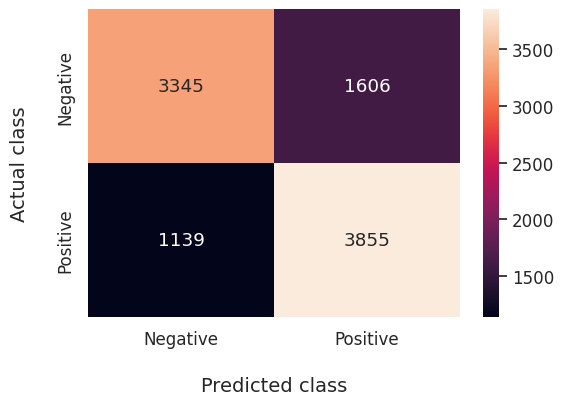

In [ ]:
#Визуализация матрицы ошибок (Визуализация предсказанных значений)
plt.figure(figsize=(6,4), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(knn_matrix, annot=True, fmt='d', )
ax.set_xlabel("Predicted class", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_ylabel("Actual class", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

In [ ]:
#Визуализация Roc-кривой, подсчет Auc
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

AUC: 0.79


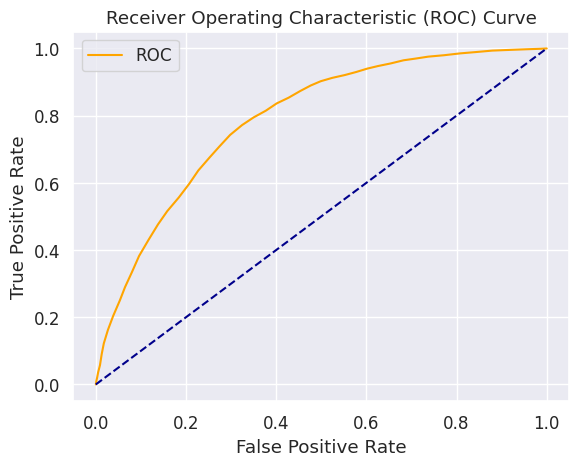

In [ ]:
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
print('AUC: %.2f' % auc)
plot_roc_curve(fpr, tpr)

### Метод опорных векторов (SVM)

In [ ]:
#Подключение библиотек
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
# Roc curve and Auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
#Разделение зависимых и независимых переменных (столбцов)
X = df.iloc[:,1:15].values
y = df.iloc[:,0].values
#Разделение датасета на обучающие и тестовые данные (75% Обучающие, 25% Тестовые)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25)

In [ ]:
#Обучение модели алгоритмом KNN с подобранным параметром
classifier = SVC(kernel='linear',probability=True)
classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
#Тестирование модели
y_pred = classifier.predict(X_test)

In [ ]:
#Оценка качества прогноза алгоритма
svm_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3392 1486]
 [1189 3878]]
              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72      4878
         1.0       0.72      0.77      0.74      5067

    accuracy                           0.73      9945
   macro avg       0.73      0.73      0.73      9945
weighted avg       0.73      0.73      0.73      9945



In [ ]:
#Доля правильных предсказаний модели
print(accuracy_score(y_test, y_pred))

0.7310206133735545


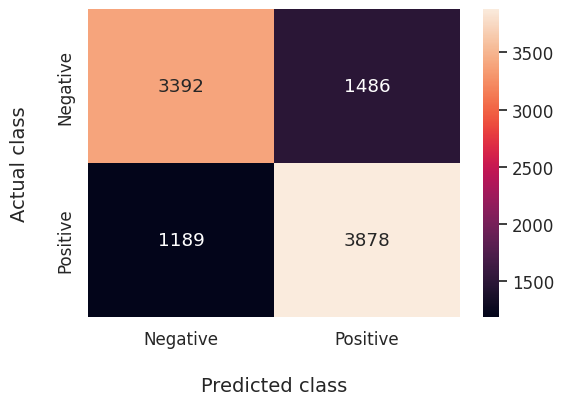

In [ ]:
#Визуализация матрицы ошибок (Визуализация предсказанных значений)
plt.figure(figsize=(6,4), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(svm_matrix, annot=True, fmt='d', )
ax.set_xlabel("Predicted class", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_ylabel("Actual class", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

In [ ]:
#Визуализация Roc-кривой, подсчет Auc
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

AUC: 0.80


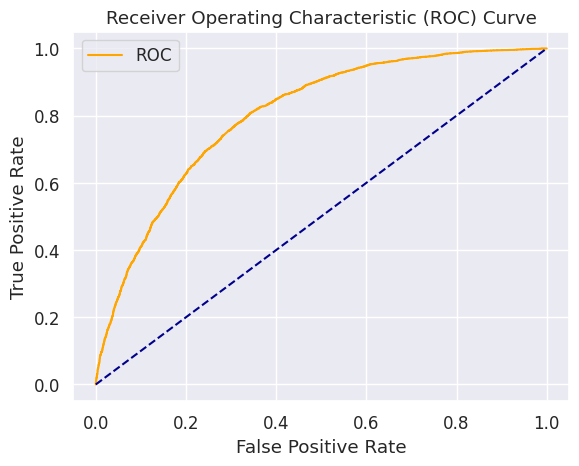

In [ ]:
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
print('AUC: %.2f' % auc)
plot_roc_curve(fpr, tpr)

### Дерево решений

In [ ]:
#Подключение библиотек
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
# Roc curve and Auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# DecisionTree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
#Разделение зависимых и независимых переменных (столбцов)
X = df.iloc[:,1:15].values
y = df.iloc[:,0].values
#Разделение датасета на обучающие и тестовые данные (75% Обучающие, 25% Тестовые)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
#Подбор параметров с помощью Grid Search (Определение наилучших параметров для модели)
params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}
classifier = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)
classifier.fit(X_train, y_train)
print(classifier.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'splitter': 'random'}


In [ ]:
#Обучение модели алгоритмом дерево решений с подобранными параметрами
classifier = DecisionTreeClassifier(max_depth=8,criterion='gini',max_features=None, splitter='random')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, splitter='random')

In [ ]:
#Тестирование модели
y_pred = classifier.predict(X_test)

In [ ]:
#Оценка качества прогноза алгоритма
tree_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3344 1643]
 [1055 3903]]
              precision    recall  f1-score   support

         0.0       0.76      0.67      0.71      4987
         1.0       0.70      0.79      0.74      4958

    accuracy                           0.73      9945
   macro avg       0.73      0.73      0.73      9945
weighted avg       0.73      0.73      0.73      9945



In [ ]:
#Доля правильных предсказаний модели
print(accuracy_score(y_test, y_pred))

0.7287078934137757


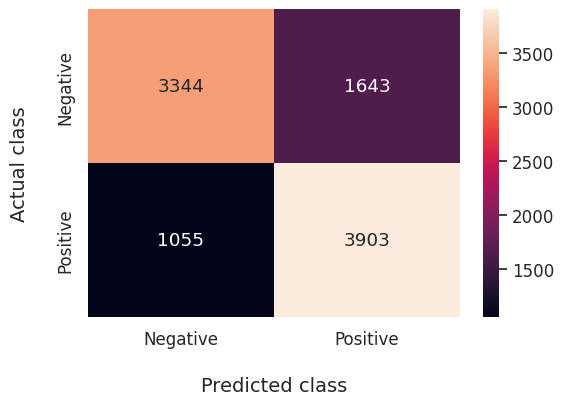

In [ ]:
#Визуализация матрицы ошибок (Визуализация предсказанных значений)
plt.figure(figsize=(6,4), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(tree_matrix, annot=True, fmt='d', )
ax.set_xlabel("Predicted class", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_ylabel("Actual class", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

In [ ]:
#Визуализация Roc-кривой, подсчет Auc
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

AUC: 0.80


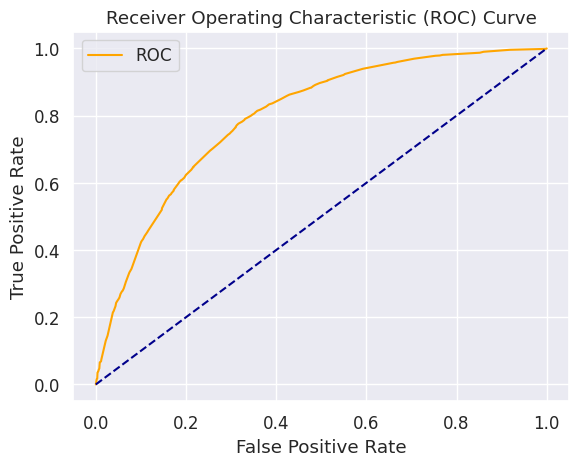

In [ ]:
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
print('AUC: %.2f' % auc)
plot_roc_curve(fpr, tpr)

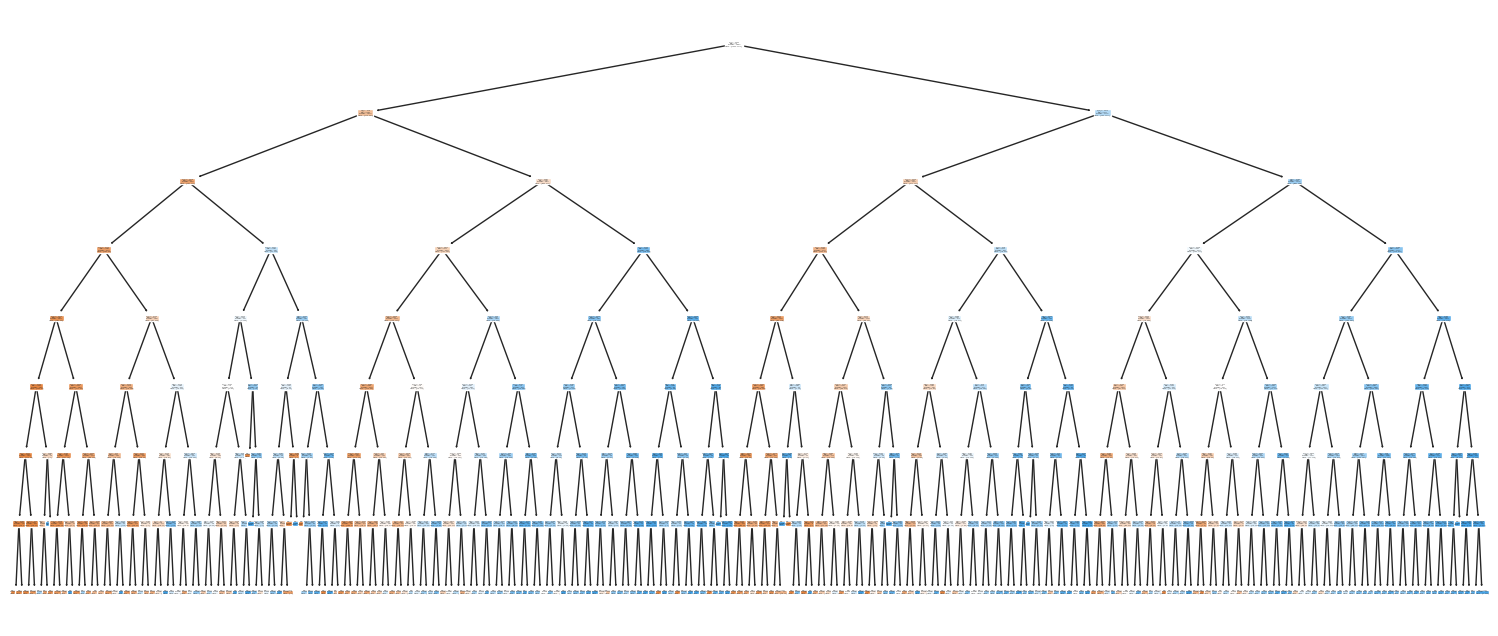

In [ ]:
#Построение дерева решений
plt.figure(figsize=(19, 8))
plot_tree(classifier, filled=True)
plt.show()

# **Модуль 3**

### 1. Метод К-средних

In [ ]:
#Подключение Google диск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Подключение библиотек
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
# matplotlib Inline позволяет выводить график в каждой отдельной ячейке для всего ноутбука
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import random

In [ ]:
#Подключение датасета
df = pd.read_csv('/content/drive/MyDrive/МашОбуч/BALANCE.csv', sep = ',')
df=df.drop("Unnamed: 0", axis=1)

In [ ]:
#Выбираем колонки для кластеризации
X = df.iloc[:, [0, 14]].values

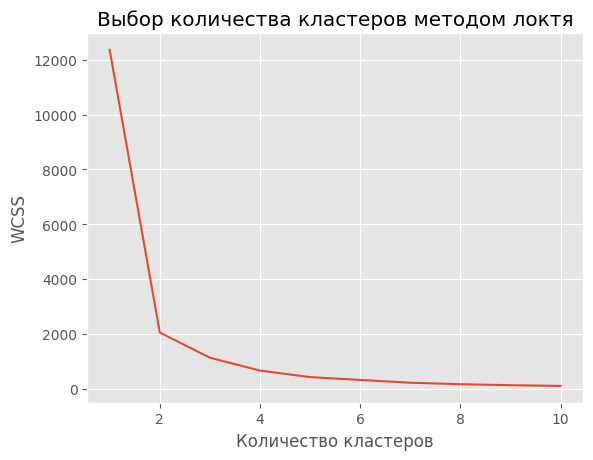

In [ ]:
#Выбор оптимального количества кластеров
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init = 12)
#n_clusters: это количество кластеров, на которые мы хотим разбить наши наблюдения
#init: определяет, как мы выберем первоначальное расположение (инициализацию) центроидов; есть два варианта, выбрать центроиды случайно init = 'random' или
#выбрать их так, чтобы центроиды с самого начала располагались максимально далеко друг от друга init = 'k-means++'
#random_state: Установка начального состояния генератора позволяет получить одинаковые последовательности случайных чисел при каждом выполнении программы
#n_init: сколько раз алгоритм будет инициализирован, т.е. сколько раз будут выбраны центроиды до начала оптимизации; на выходе будет выбран тот вариант, где ошибка была минимальна
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS') #Показатель ошибки
plt.show()

In [ ]:
#Обучим модель с тремя кластерами (объект класса)
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
#Обучение и прогноз модели
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#К таблице данных df добавим столбец cluster
df['cluster'] = kmeans.labels_
df

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Stroke,Diabetes,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,cluster
0,0.0,0.0,0.0,0.185185,1.0,0.0,0.0,1.0,1.0,0.50,0.133333,0.000000,0.0,0.0,1.000000,0
1,0.0,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,1.0,0.25,0.033333,0.033333,0.0,1.0,0.333333,0
2,0.0,1.0,1.0,0.444444,0.0,0.0,0.0,1.0,1.0,0.75,0.133333,0.066667,0.0,0.0,0.583333,0
3,0.0,0.0,0.0,0.629630,0.0,0.0,0.0,1.0,1.0,0.25,0.000000,0.000000,0.0,1.0,0.000000,0
4,0.0,0.0,0.0,0.444444,0.0,0.0,0.0,0.0,1.0,0.25,0.000000,0.000000,0.0,0.0,0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39775,1.0,1.0,0.0,0.629630,0.0,1.0,1.0,1.0,1.0,0.75,0.000000,1.000000,0.0,1.0,0.833333,1
39776,1.0,1.0,1.0,0.185185,0.0,0.0,0.0,1.0,0.0,1.00,0.500000,0.666667,1.0,1.0,0.916667,1
39777,1.0,1.0,1.0,0.481481,0.0,1.0,1.0,0.0,1.0,0.75,1.000000,0.166667,0.0,1.0,0.666667,1
39778,1.0,0.0,1.0,0.518519,0.0,0.0,1.0,0.0,1.0,0.50,0.000000,0.000000,1.0,1.0,0.666667,1


In [ ]:
#Вывод средних значений для каждого кластера
df.groupby('cluster').mean()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Stroke,Diabetes,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
cluster,,,,,,,,,,,,,,,
0,0.0,0.450478,0.445299,0.524650,0.043288,0.170814,0.692006,0.582554,0.756008,0.419206,0.150607,0.184754,0.204324,0.417295,0.569813
1,1.0,0.737707,0.690649,0.540096,0.176823,0.346254,0.629110,0.596129,0.752690,0.599271,0.161919,0.317484,0.425993,0.561337,0.761882


In [ ]:
#Сравнение кластеризации с реальными классами
result = df
result['compare'] = (result['HeartDiseaseorAttack'] == result['cluster'])
print(result['compare'].value_counts())

True    39780
Name: compare, dtype: int64


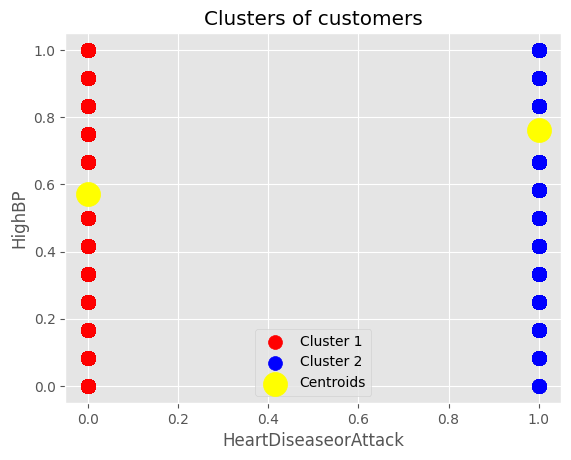

In [ ]:
#Визуализация кластеризации
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('HeartDiseaseorAttack')
plt.ylabel('HighBP')
plt.legend()
plt.show()

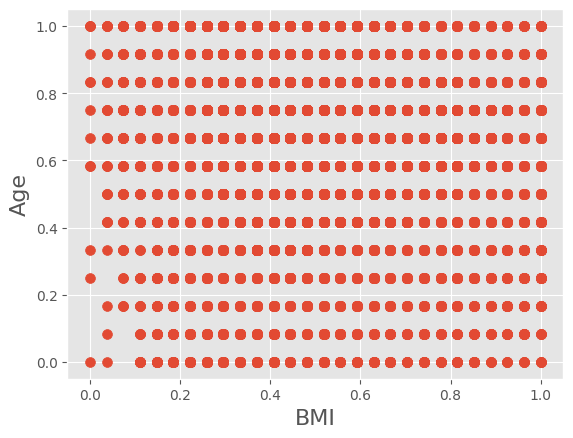

In [ ]:
#Дополнительная визуализация предсказанных значений
df = pd.read_csv('/content/drive/MyDrive/МашОбуч/BALANCE.csv', sep = ',')
df=df.drop("Unnamed: 0", axis=1)
X = df.values
k_means = KMeans(init = "k-means++", n_clusters = 2, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
df["Cluster"] = labels
#df.groupby('Cluster').mean()

plt.scatter(df.iloc[:, 3], df.iloc[:, 14], s = 50)
plt.xlabel('BMI', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.show()

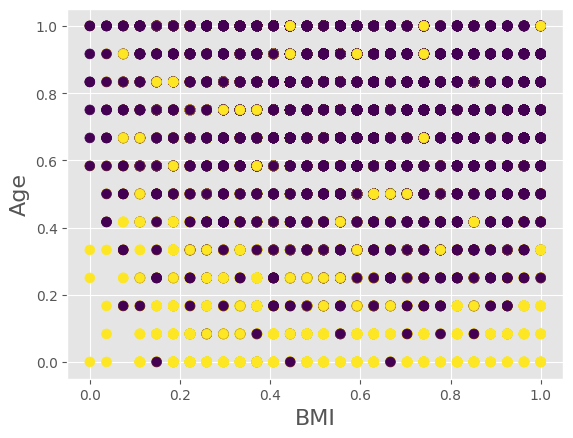

In [ ]:
plt.scatter(X[:, 3], X[:, 14], s = 50, c = labels, cmap = 'viridis')
plt.xlabel('BMI', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.show()

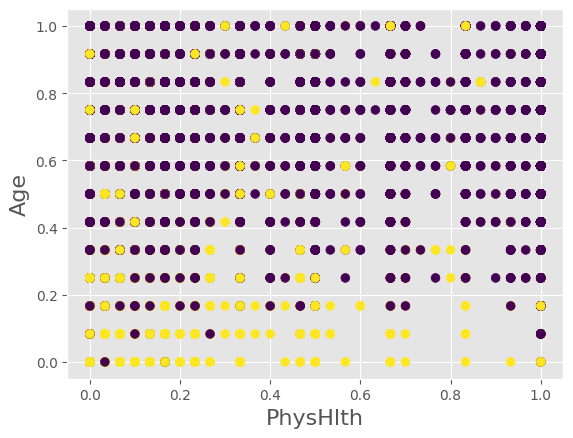

In [ ]:
plt.scatter(X[:, 11], X[:, 14], s=40, c = k_means.labels_, cmap = 'viridis')
plt.xlabel('PhysHlth', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.show()

### 2. DBSCAN

In [ ]:
#Подключение Google диск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Подключение библиотек
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
#Подключение датасета
df = pd.read_csv('/content/drive/MyDrive/МашОбуч/BALANCE.csv', sep = ',')
df=df.drop("Unnamed: 0", axis=1)

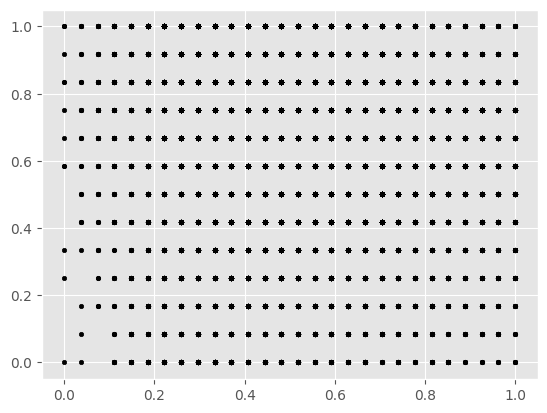

In [ ]:
#Визуализация исходных данных
x=df.iloc[:,[3,14]].values
plt.scatter(x[:,0], x[:,1], s=10, c= "black")

In [ ]:
#Обучение модели кластеризацией DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=4)
#eps: расстояние, определяющее окрестности. Две точки считаются соседними, если расстояние между ними меньше или равно eps.
#min_samples: минимальное количество точек данных для определения кластера.
labels = dbscan.fit_predict(x)

In [ ]:
#Добавим столбец кластеров
df["Cluster"] = labels
df.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Stroke,Diabetes,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Cluster
0,0.0,0.0,0.0,0.185185,1.0,0.0,0.0,1.0,1.0,0.50,0.133333,0.000000,0.0,0.0,1.000000,0
1,0.0,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,1.0,0.25,0.033333,0.033333,0.0,1.0,0.333333,1
2,0.0,1.0,1.0,0.444444,0.0,0.0,0.0,1.0,1.0,0.75,0.133333,0.066667,0.0,0.0,0.583333,2
3,0.0,0.0,0.0,0.629630,0.0,0.0,0.0,1.0,1.0,0.25,0.000000,0.000000,0.0,1.0,0.000000,3
4,0.0,0.0,0.0,0.444444,0.0,0.0,0.0,0.0,1.0,0.25,0.000000,0.000000,0.0,0.0,0.333333,1


In [ ]:
#Вывод средних значений для каждого кластера
df.groupby('Cluster').mean()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Stroke,Diabetes,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
Cluster,,,,,,,,,,,,,,,
-1,0.000000,0.000000,0.000000,0.018519,0.000000,0.000000,0.750000,0.500000,0.750000,0.437500,0.266667,0.058333,0.500000,0.500000,0.083333
0,0.729351,0.715345,0.596704,0.462799,0.177755,0.277549,0.591761,0.720700,0.764161,0.551751,0.084312,0.272558,0.457878,0.453553,1.000000
1,0.175904,0.336145,0.362651,0.541611,0.039759,0.114759,0.703614,0.552410,0.765060,0.428012,0.205000,0.186968,0.148193,0.460843,0.333333
2,0.443535,0.587094,0.602058,0.555989,0.103343,0.254501,0.670330,0.548983,0.754968,0.529343,0.206609,0.284888,0.321487,0.486790,0.583333
3,0.043046,0.112583,0.124172,0.444077,0.014901,0.024007,0.839404,0.546358,0.698675,0.339404,0.212196,0.101876,0.031457,0.533113,0.000000
4,0.105114,0.220644,0.235795,0.520062,0.027462,0.041667,0.754735,0.577652,0.800189,0.367188,0.184154,0.130713,0.068182,0.442235,0.166667
5,0.593862,0.683440,0.662384,0.554670,0.124019,0.332173,0.663812,0.563348,0.747502,0.527659,0.139728,0.262509,0.342612,0.532120,0.750000
6,0.678360,0.730978,0.637606,0.513551,0.144442,0.313645,0.630384,0.644828,0.754449,0.533918,0.091325,0.256212,0.366005,0.483879,0.916667
7,0.370207,0.514771,0.541483,0.559653,0.081710,0.231144,0.658391,0.537398,0.745129,0.508799,0.218783,0.269359,0.290069,0.471402,0.500000


<ipython-input-165-09df0aefad17>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[labels == 11, 0], x[labels == 11, 1], s = 10, cmap='viridis')
<ipython-input-165-09df0aefad17>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[labels == 12, 0], x[labels == 12, 1], s = 10, cmap='viridis')


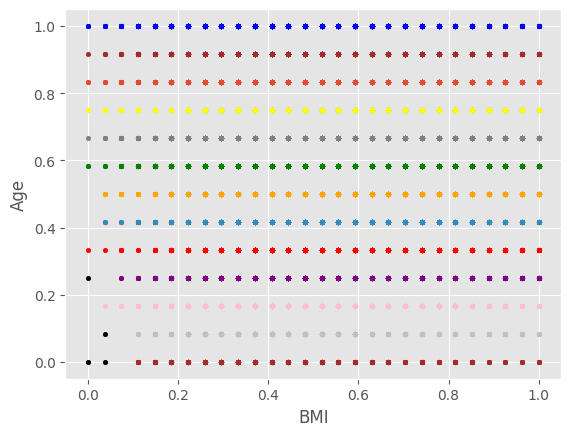

In [ ]:
#Визуализация кластеров
plt.scatter(x[labels == -1, 0], x[labels == -1, 1], s = 10, c = 'black') #Выбросы - не относящийся ни к какому кластеру
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], s = 10, c = 'blue')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], s = 10, c = 'red')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], s = 10, c = 'green')
plt.scatter(x[labels == 3, 0], x[labels == 3, 1], s = 10, c = 'brown')
plt.scatter(x[labels == 4, 0], x[labels == 4, 1], s = 10, c = 'pink')
plt.scatter(x[labels == 5, 0], x[labels == 5, 1], s = 10, c = 'yellow')
plt.scatter(x[labels == 6, 0], x[labels == 6, 1], s = 10, c = 'brown')
plt.scatter(x[labels == 7, 0], x[labels == 7, 1], s = 10, c = 'orange')
plt.scatter(x[labels == 8, 0], x[labels == 8, 1], s = 10, c = 'purple')
plt.scatter(x[labels == 9, 0], x[labels == 9, 1], s = 10, c = 'silver')
plt.scatter(x[labels == 10, 0], x[labels == 10, 1], s = 10, c = 'gray')
plt.scatter(x[labels == 11, 0], x[labels == 11, 1], s = 10, cmap='viridis')
plt.scatter(x[labels == 12, 0], x[labels == 12, 1], s = 10, cmap='viridis')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

In [ ]:
#Сравнение разбиения на классы с помощью кластеризации с реальными невозможен, поскольку было определено большое количество кластеров (12), а разбиения на реальных класса всего 2

### Подбор параметров модели DBSCAN

In [ ]:
#  Значения параметров совпадают со значениями "по умолчанию"
#dbscan_1 = DBSCAN(eps=0.5, min_samples=5)
#  Обучим модель DBSCAN
#dbscan_1.fit(df)

dbscan_2 = DBSCAN(eps=0.05, min_samples=4)
dbscan_2.fit(x)
#Вывод определенных кластеров
unique, counts = np.unique(dbscan_2.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  -1    4]
 [   0 4855]
 [   1 1660]
 [   2 4277]
 [   3  604]
 [   4 1056]
 [   5 5604]
 [   6 3877]
 [   7 3182]
 [   8 1369]
 [   9  710]
 [  10 5299]
 [  11 5019]
 [  12 2264]]


### 3. Иерархическая кластеризация

In [ ]:
#Подключение Google диск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Подключение библиотек
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Подключение датасета
df = pd.read_csv('/content/drive/MyDrive/МашОбуч/BALANCE.csv', sep = ',')
df=df.drop("Unnamed: 0", axis=1)

In [ ]:
#Выбираем колонки для кластеризации
X = df.iloc[:, [3, 14]].values

In [ ]:
#Использование дендрограммы для поиска оптимального количества кластеров
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
#метод 'ward' связывает точки на основе минимизации ошибок.
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

KeyboardInterrupt: ignored

In [ ]:
#Обучение модели иерархической кластеризации на наборе данных
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
#Наиболее оптимальные параметры которые обычно используются: euclidean: “евклидово” (расстояние между точками данных),
#метод 'ward' связывает точки на основе минимизации ошибок.
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
#Визуализация кластеров
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

NameError: ignored

# **Модуль 4**

### Подключение датасета

In [ ]:
#Подключение Google диск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Подключение библиотек
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
# matplotlib Inline позволяет выводить график в каждой отдельной ячейке для всего ноутбука
%matplotlib inline
import seaborn as sns
import sklearn

In [ ]:
#Подключение датасета
df = pd.read_csv('/content/drive/MyDrive/МашОбуч/BALANCE.csv', sep = ',')
df=df.drop("Unnamed: 0", axis=1)

In [ ]:
#Информация о количестве пропусков
df.isna().sum() #Вывод количества пропусков

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
BMI                     0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64

In [ ]:
#Информация о количестве пропусков
df.isna().sum() #Вывод количества пропусков

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
BMI                     0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64

In [ ]:
# Построение матрицы корреляций
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Stroke,Diabetes,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
HeartDiseaseorAttack,1.000000,0.292455,0.247649,0.039641,0.213342,0.204013,-0.066413,0.013797,-0.003854,0.319346,0.019175,0.182324,0.238570,0.144075,0.389584
HighBP,0.292455,1.000000,0.281407,0.183320,0.135448,0.238180,-0.080537,-0.010708,-0.028603,0.257187,0.017906,0.140218,0.206037,0.041473,0.312580
HighChol,0.247649,0.281407,1.000000,0.101414,0.092170,0.182665,-0.041866,-0.023167,-0.011878,0.175821,0.031214,0.100977,0.133736,0.038312,0.222014
BMI,0.039641,0.183320,0.101414,1.000000,-0.004134,0.216237,-0.078254,-0.055352,-0.019211,0.121242,0.023228,0.049964,0.129654,0.053866,-0.050761
Stroke,0.213342,0.135448,0.092170,-0.004134,1.000000,0.103614,-0.054269,0.006835,-0.021746,0.191191,0.063290,0.149124,0.182275,0.002856,0.138136
Diabetes,0.204013,0.238180,0.182665,0.216237,0.103614,1.000000,-0.078713,-0.011062,-0.022695,0.249444,0.028822,0.131967,0.192889,0.052879,0.175057
PhysActivity,-0.066413,-0.080537,-0.041866,-0.078254,-0.054269,-0.078713,1.000000,0.111353,0.107413,-0.213678,-0.085991,-0.184702,-0.227905,0.056736,-0.087773
Fruits,0.013797,-0.010708,-0.023167,-0.055352,0.006835,-0.011062,0.111353,1.000000,0.234802,-0.045599,-0.040143,-0.001588,-0.016231,-0.071813,0.077760
Veggies,-0.003854,-0.028603,-0.011878,-0.019211,-0.021746,-0.022695,0.107413,0.234802,1.000000,-0.056956,-0.022748,-0.014096,-0.037744,-0.052967,-0.003258
GenHlth,0.319346,0.257187,0.175821,0.121242,0.191191,0.249444,-0.213678,-0.045599,-0.056956,1.000000,0.253113,0.541016,0.454807,-0.012009,0.167057


### Визуализация данных

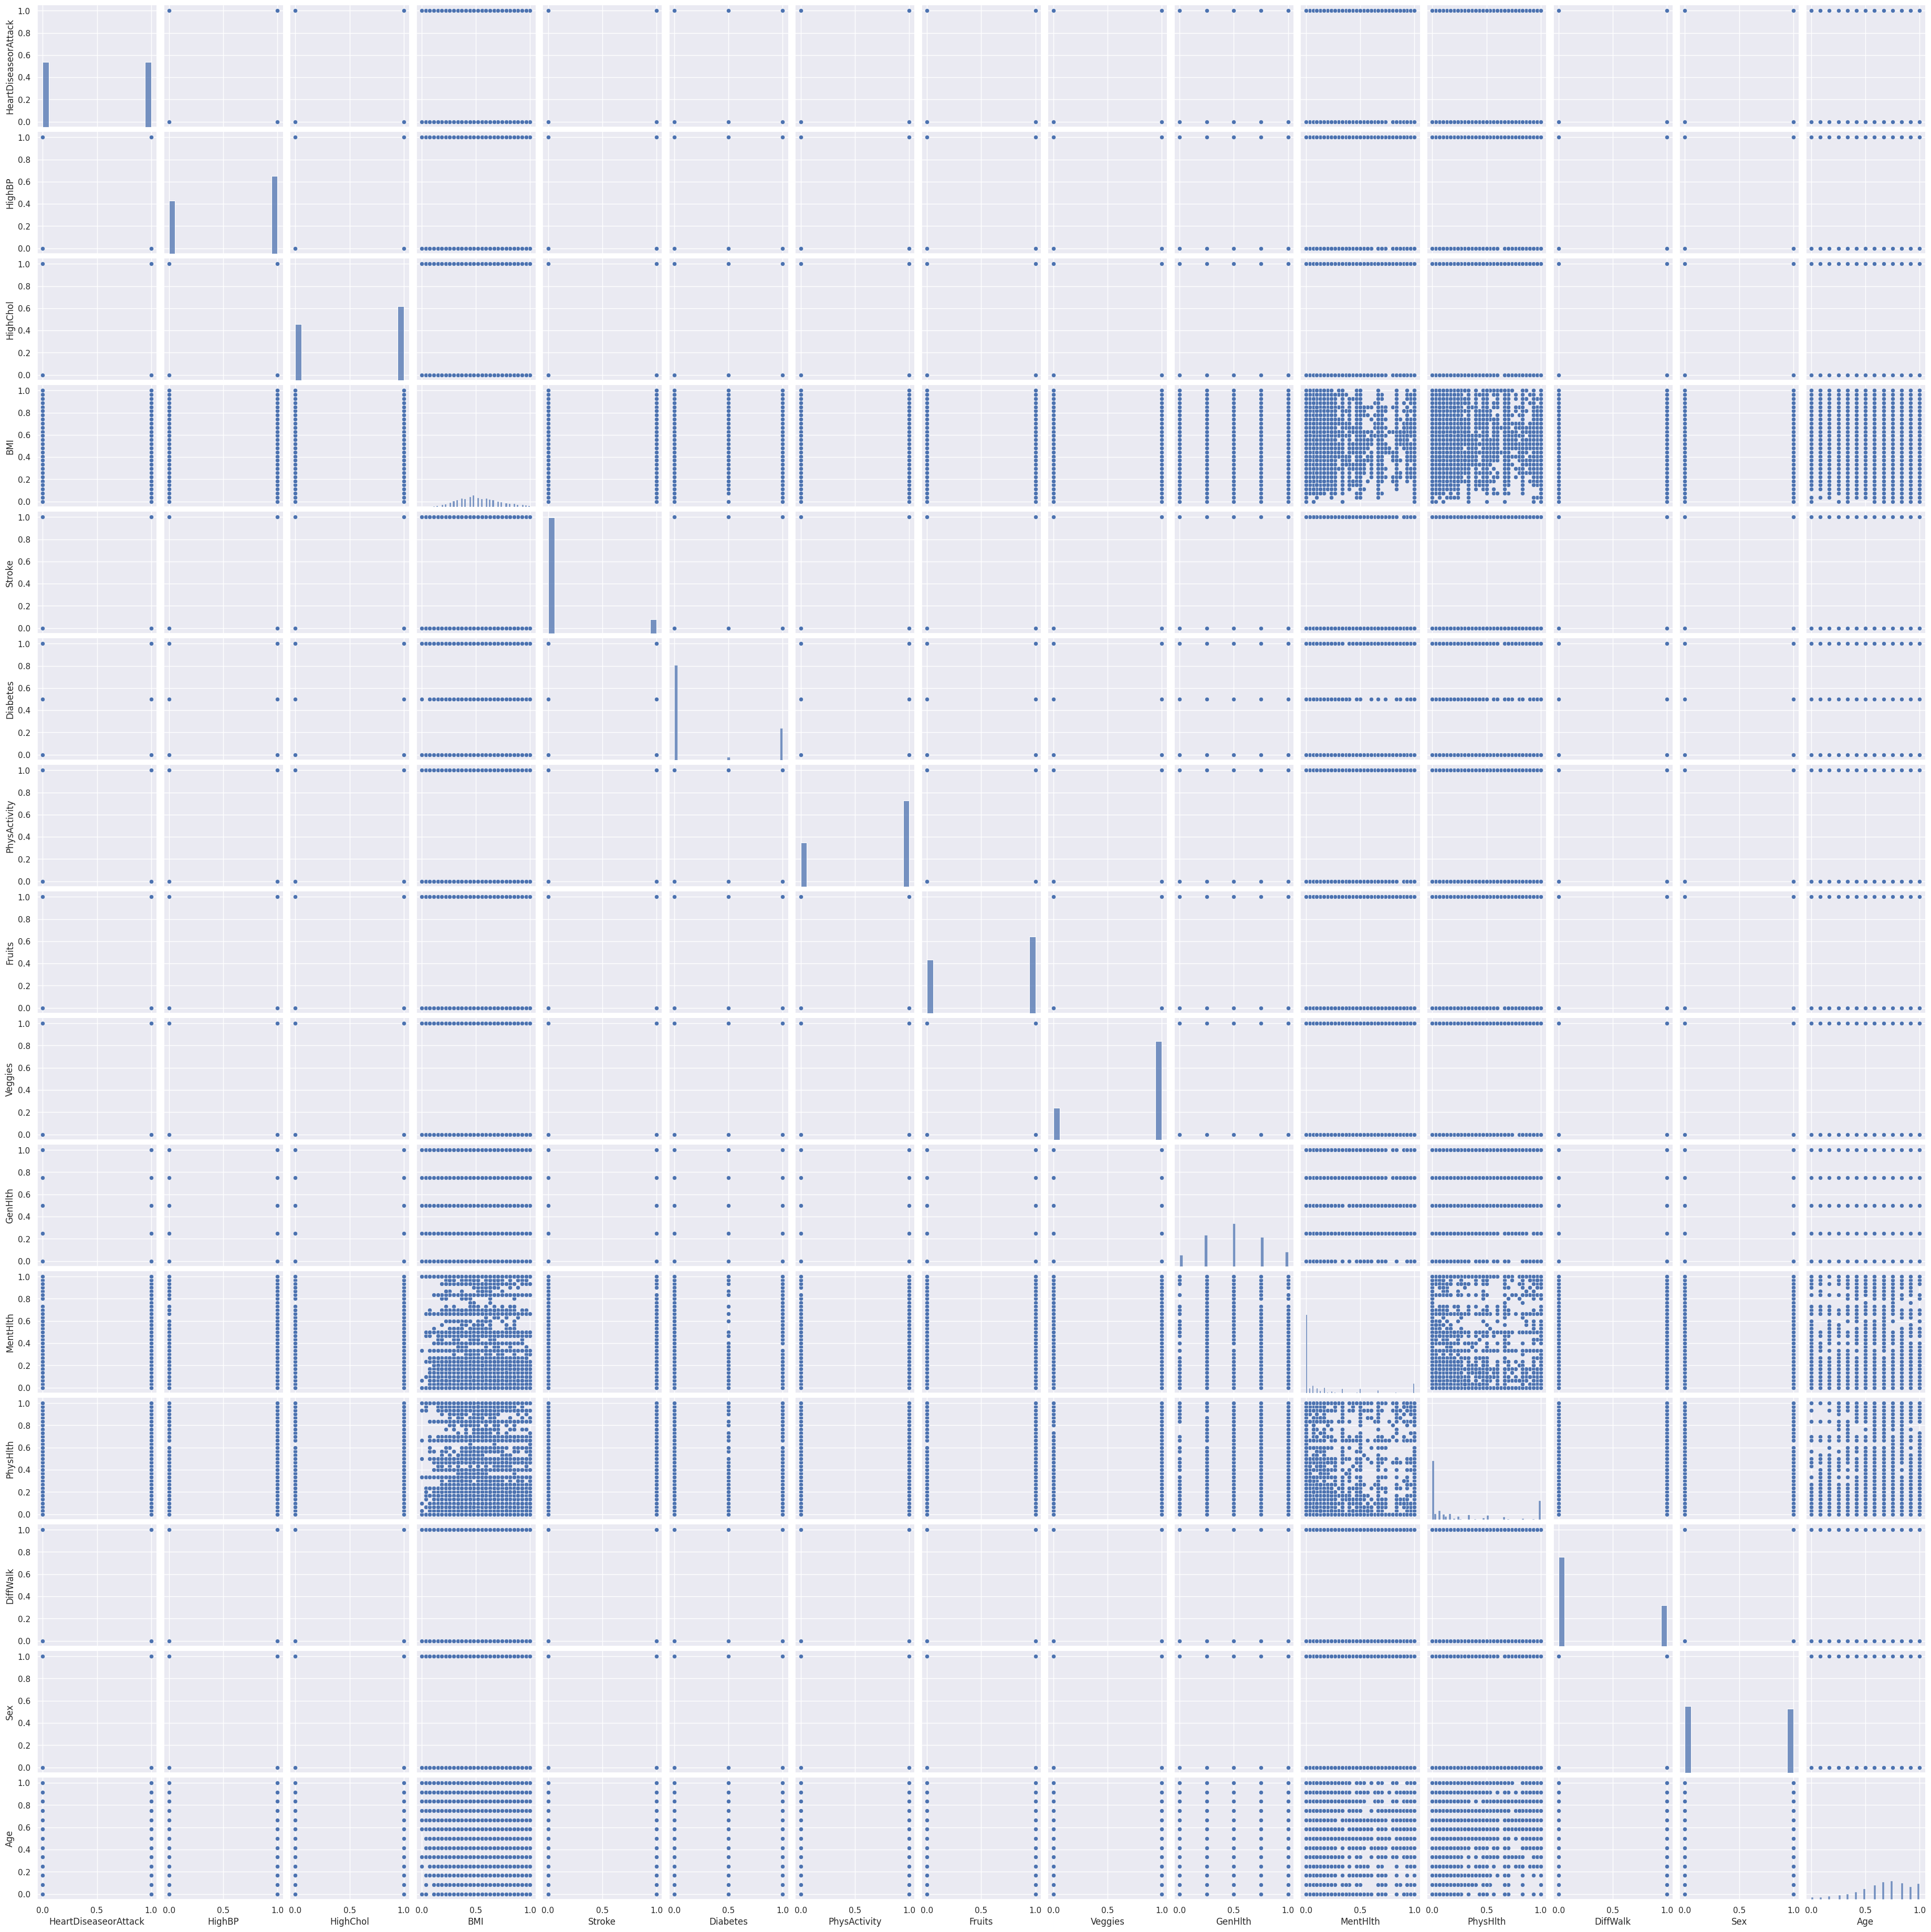

In [ ]:
#Построение диаграмм рассеяния
sns.pairplot(df)

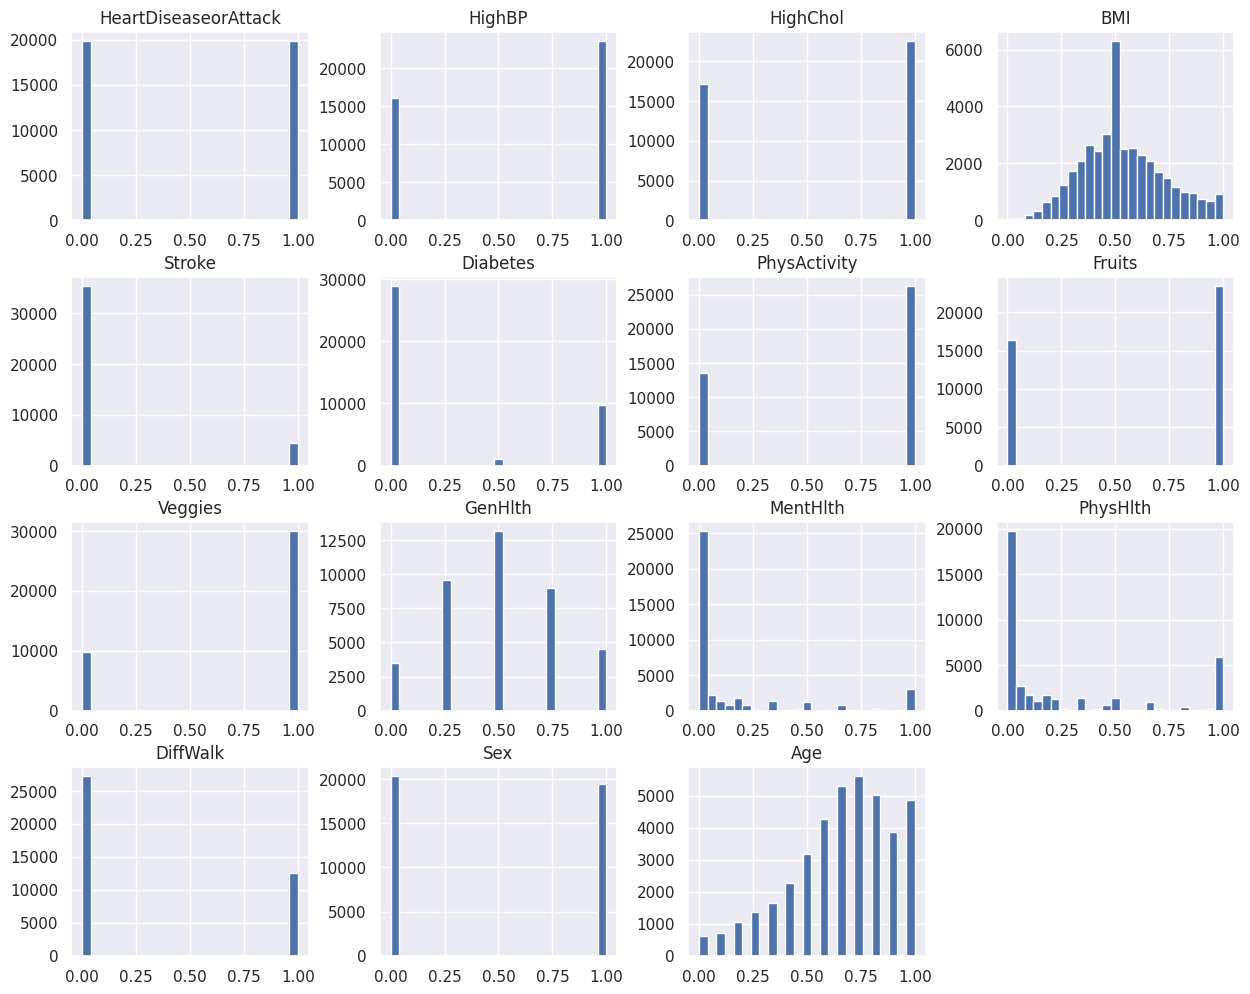

In [ ]:
#Построение гистограмм
df.hist(bins=25, figsize=(15,12))
plt.show()

<Axes: >

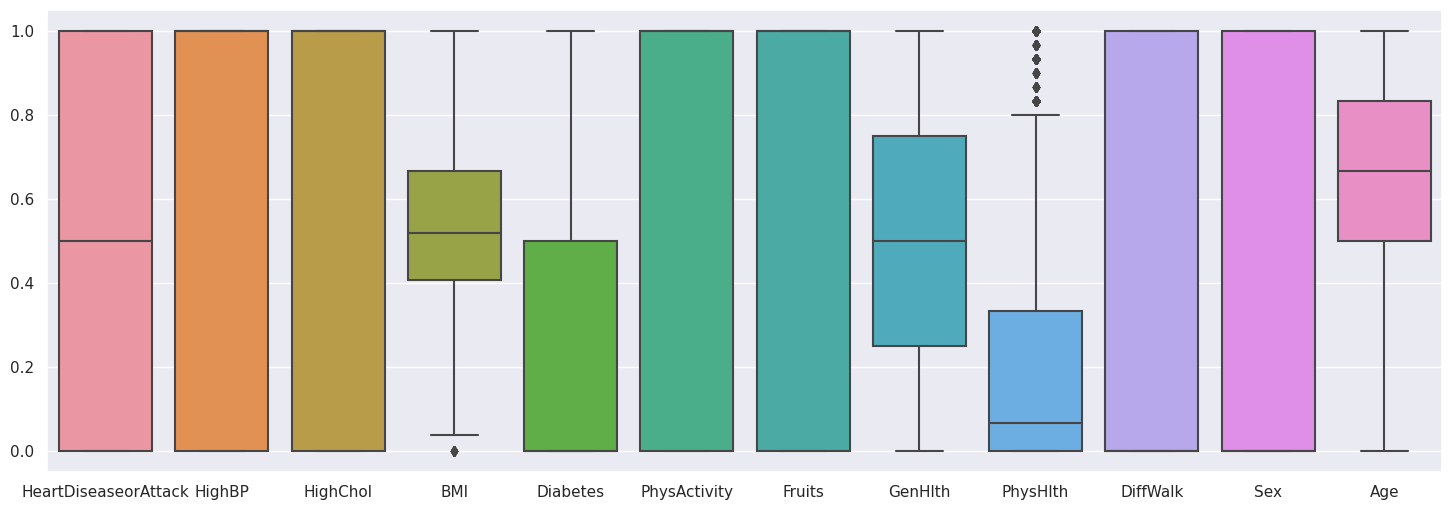

In [ ]:
#Построение ящиков с усами
sns.set(rc={"figure.figsize":(18, 6)}) #width=8, height=4
sns.boxplot(df)

### Линейная регрессия

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#Разделение зависимых и независимых переменных (столбцов)
X = df.iloc[:,1:15].values
y = df.iloc[:,0].values

In [ ]:
#Разделение датасета на обучающие и тестовые данные (70% Обучающие, 30% Тестовые)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
#Размерность обучающей выборки
print(X_train.shape, y_train.shape)
#Размерность тестовой выборки
print(X_test.shape, y_test.shape)

(27846, 14) (27846,)
(11934, 14) (11934,)


In [ ]:
#Создадим объект класса и запишем в переменную model
model = LinearRegression()
#Обучим нашу модель
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Предсказания модели
y_pred = model.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,1.0,0.676262
1,1.0,0.082514
2,1.0,0.092057
3,1.0,0.436076
4,1.0,0.820294
...,...,...
11929,1.0,0.751268
11930,0.0,0.455175
11931,0.0,0.224644
11932,0.0,0.512697


In [ ]:
print('Коэффициент детерминации R-квадрат (R2):', np.round(metrics.r2_score(y_test, y_pred), 2))
print('Средняя абсолютная ошибка (MAE - Mean Absolute Error):', metrics.mean_absolute_error(y_test, y_pred))
print('Среднеквадратичная ошибка (MSE - Mean Squared Error):', metrics.mean_squared_error(y_test, y_pred))
print('Корень из среднеквадратичной ошибки (RMSE - Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#R-квадрат это статистика показывает процент дисперсии зависимой переменной, которую независимые переменные объясняют вместе. Также называется коэффициентом детерминации.
#MAE измеряет среднюю величину ошибок в наборе прогнозов без учета их направления. То расстояние между фактическим значением Y и прогнозируемым значением Y
#MSE измеряет среднее значение квадратов ошибок
#RMSE — это квадратный корень из среднего квадрата всех ошибок. RMSE является хорошей мерой точности, но только для сравнения ошибок прогнозирования

Коэффициент детерминации R-квадрат (R2): 0.28
Средняя абсолютная ошибка (MAE - Mean Absolute Error): 0.3686867574198143
Среднеквадратичная ошибка (MSE - Mean Squared Error): 0.1802745500928596
Корень из среднеквадратичной ошибки (RMSE - Root Mean Squared Error): 0.42458750581341836


<ipython-input-10-f7d4a70d285b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: ylabel='Density'>

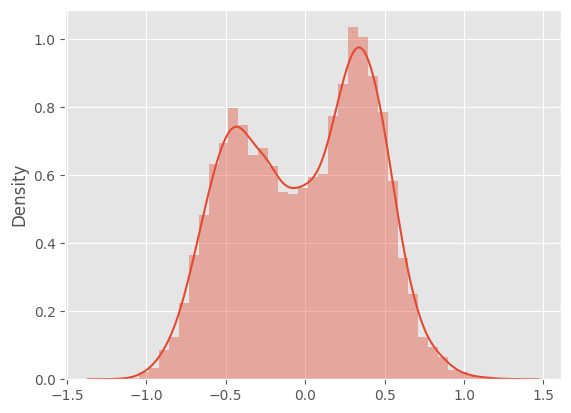

In [ ]:
sns.distplot(y_test-y_pred)

In [ ]:
# Построение матрицы корреляций
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Stroke,Diabetes,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
HeartDiseaseorAttack,1.000000,0.292455,0.247649,0.039641,0.213342,0.204013,-0.066413,0.013797,-0.003854,0.319346,0.019175,0.182324,0.238570,0.144075,0.389584
HighBP,0.292455,1.000000,0.281407,0.183320,0.135448,0.238180,-0.080537,-0.010708,-0.028603,0.257187,0.017906,0.140218,0.206037,0.041473,0.312580
HighChol,0.247649,0.281407,1.000000,0.101414,0.092170,0.182665,-0.041866,-0.023167,-0.011878,0.175821,0.031214,0.100977,0.133736,0.038312,0.222014
BMI,0.039641,0.183320,0.101414,1.000000,-0.004134,0.216237,-0.078254,-0.055352,-0.019211,0.121242,0.023228,0.049964,0.129654,0.053866,-0.050761
Stroke,0.213342,0.135448,0.092170,-0.004134,1.000000,0.103614,-0.054269,0.006835,-0.021746,0.191191,0.063290,0.149124,0.182275,0.002856,0.138136
Diabetes,0.204013,0.238180,0.182665,0.216237,0.103614,1.000000,-0.078713,-0.011062,-0.022695,0.249444,0.028822,0.131967,0.192889,0.052879,0.175057
PhysActivity,-0.066413,-0.080537,-0.041866,-0.078254,-0.054269,-0.078713,1.000000,0.111353,0.107413,-0.213678,-0.085991,-0.184702,-0.227905,0.056736,-0.087773
Fruits,0.013797,-0.010708,-0.023167,-0.055352,0.006835,-0.011062,0.111353,1.000000,0.234802,-0.045599,-0.040143,-0.001588,-0.016231,-0.071813,0.077760
Veggies,-0.003854,-0.028603,-0.011878,-0.019211,-0.021746,-0.022695,0.107413,0.234802,1.000000,-0.056956,-0.022748,-0.014096,-0.037744,-0.052967,-0.003258
GenHlth,0.319346,0.257187,0.175821,0.121242,0.191191,0.249444,-0.213678,-0.045599,-0.056956,1.000000,0.253113,0.541016,0.454807,-0.012009,0.167057


### LASSO

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Подключение датасета
df = pd.read_csv('/content/drive/MyDrive/МашОбуч/BALANCE.csv', sep = ',')
df=df.drop("Unnamed: 0", axis=1)

In [ ]:
#Разделение зависимых и независимых переменных (столбцов)
X = df.iloc[:,1:15].values
y = df.iloc[:,0].values

In [ ]:
#Выполнение k-кратной перекрестной проверки, чтобы найти оптимальное значение альфа
#k-кратной перекрестной проверки(k = 10 раз) и повторим процесс перекрестной проверки 3 раза.
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)
model.fit(X, y)
#Альфа-параметр представляет собой взаимосвязь между производительностью модели на тренировочном наборе и ее простотой.
#Увеличение значения альфа (его значение по умолчанию равно 1,0) упрощает модель за счет уменьшения коэффициентов.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3228.567538101849, tolerance: 0.8950499972068592
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1), n_jobs=-1)

In [ ]:
#Оптимальный параметр альфа
print(model.alpha_)

0.0


In [ ]:
#Разделение датасета на обучающие и тестовые данные (70% Обучающие, 30% Тестовые)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
#Обучение модели
model = Lasso(alpha=0.0)
model.fit(X_train,y_train)

<ipython-input-361-f4006aeb8de7>:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.486e+03, tolerance: 6.961e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.0)

In [ ]:
#Предсказания модели
y_pred = model.predict(X_test)

In [ ]:
print('Коэффициент детерминации R-квадрат (R2):', r2_score(y_test,y_pred))
print('Среднеквадратичная ошибка (MSE - Mean Squared Error):', mean_squared_error(y_test,y_pred))

#R-квадрат это статистика показывает процент дисперсии зависимой переменной, которую независимые переменные объясняют вместе. Также называется коэффициентом детерминации.
#MSE измеряет среднее значение квадратов ошибок

Коэффициент детерминации R-квадрат (R2): 0.2666769039637972
Среднеквадратичная ошибка (MSE - Mean Squared Error): 0.18332644369601758


<ipython-input-320-98a9700da27f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: ylabel='Density'>

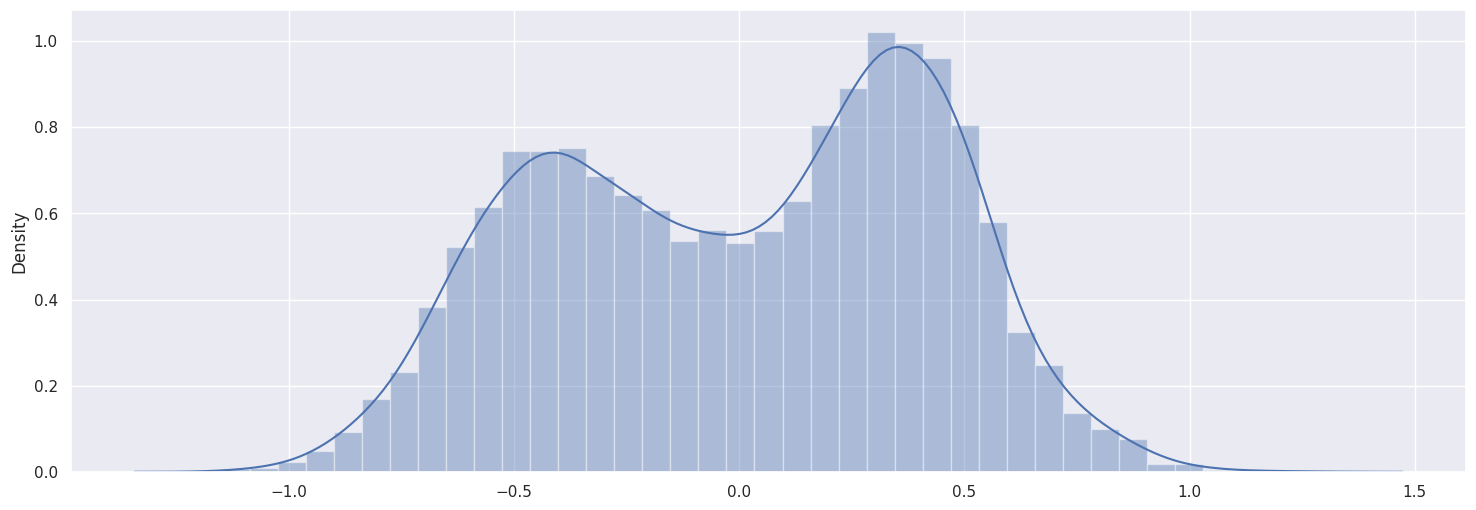

In [ ]:
sns.distplot(y_test-y_pred)

In [ ]:
# Построение матрицы корреляций
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Stroke,Diabetes,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
HeartDiseaseorAttack,1.000000,0.292455,0.247649,0.039641,0.213342,0.204013,-0.066413,0.013797,-0.003854,0.319346,0.019175,0.182324,0.238570,0.144075,0.389584
HighBP,0.292455,1.000000,0.281407,0.183320,0.135448,0.238180,-0.080537,-0.010708,-0.028603,0.257187,0.017906,0.140218,0.206037,0.041473,0.312580
HighChol,0.247649,0.281407,1.000000,0.101414,0.092170,0.182665,-0.041866,-0.023167,-0.011878,0.175821,0.031214,0.100977,0.133736,0.038312,0.222014
BMI,0.039641,0.183320,0.101414,1.000000,-0.004134,0.216237,-0.078254,-0.055352,-0.019211,0.121242,0.023228,0.049964,0.129654,0.053866,-0.050761
Stroke,0.213342,0.135448,0.092170,-0.004134,1.000000,0.103614,-0.054269,0.006835,-0.021746,0.191191,0.063290,0.149124,0.182275,0.002856,0.138136
Diabetes,0.204013,0.238180,0.182665,0.216237,0.103614,1.000000,-0.078713,-0.011062,-0.022695,0.249444,0.028822,0.131967,0.192889,0.052879,0.175057
PhysActivity,-0.066413,-0.080537,-0.041866,-0.078254,-0.054269,-0.078713,1.000000,0.111353,0.107413,-0.213678,-0.085991,-0.184702,-0.227905,0.056736,-0.087773
Fruits,0.013797,-0.010708,-0.023167,-0.055352,0.006835,-0.011062,0.111353,1.000000,0.234802,-0.045599,-0.040143,-0.001588,-0.016231,-0.071813,0.077760
Veggies,-0.003854,-0.028603,-0.011878,-0.019211,-0.021746,-0.022695,0.107413,0.234802,1.000000,-0.056956,-0.022748,-0.014096,-0.037744,-0.052967,-0.003258
GenHlth,0.319346,0.257187,0.175821,0.121242,0.191191,0.249444,-0.213678,-0.045599,-0.056956,1.000000,0.253113,0.541016,0.454807,-0.012009,0.167057


### Ридж-регрессия

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
import pandas as pd
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Подключение датасета
df = pd.read_csv('/content/drive/MyDrive/МашОбуч/BALANCE.csv', sep = ',')
df=df.drop("Unnamed: 0", axis=1)

In [ ]:
#Разделение зависимых и независимых переменных (столбцов)
X = df.iloc[:,1:15].values
y = df.iloc[:,0].values

In [ ]:
#Выполнение k-кратной перекрестной проверки, чтобы найти оптимальное значение альфа
#k-кратной перекрестной проверки(k = 10 раз) и повторим процесс перекрестной проверки 3 раза.
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RidgeCV(alphas=arange(0.01, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
model.fit(X, y)
#Альфа-параметр представляет собой взаимосвязь между производительностью модели на тренировочном наборе и ее простотой.
#Увеличение значения альфа (его значение по умолчанию равно 1,0) упрощает модель за счет уменьшения коэффициентов.

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

In [ ]:
#Оптимальный параметр альфа
print(model.alpha_)

0.01


In [ ]:
#Разделение датасета на обучающие и тестовые данные (70% Обучающие, 30% Тестовые)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
#Обучение модели
model = Ridge(alpha=0.01)
model.fit(X_train,y_train)

Ridge(alpha=0.01)

In [ ]:
#Предсказания модели
y_pred = model.predict(X_test)

In [ ]:
print('Коэффициент детерминации R-квадрат (R2):', r2_score(y_test,y_pred))
print('Среднеквадратичная ошибка (MSE - Mean Squared Error):', mean_squared_error(y_test,y_pred))

#R-квадрат это статистика показывает процент дисперсии зависимой переменной, которую независимые переменные объясняют вместе. Также называется коэффициентом детерминации.
#MSE измеряет среднее значение квадратов ошибок

Коэффициент детерминации R-квадрат (R2): 0.2867452925701648
Среднеквадратичная ошибка (MSE - Mean Squared Error): 0.17830115661935061


<ipython-input-373-f833dc606c6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: ylabel='Density'>

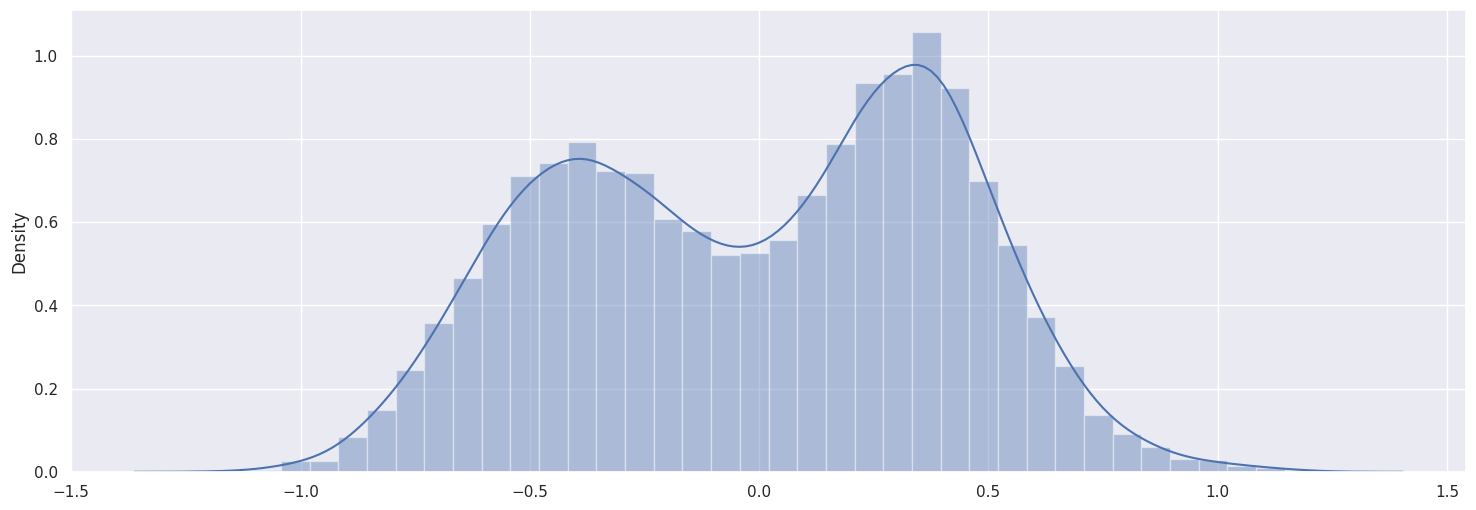

In [ ]:
sns.distplot(y_test-y_pred)

In [ ]:
# Построение матрицы корреляций
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Stroke,Diabetes,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
HeartDiseaseorAttack,1.000000,0.292455,0.247649,0.039641,0.213342,0.204013,-0.066413,0.013797,-0.003854,0.319346,0.019175,0.182324,0.238570,0.144075,0.389584
HighBP,0.292455,1.000000,0.281407,0.183320,0.135448,0.238180,-0.080537,-0.010708,-0.028603,0.257187,0.017906,0.140218,0.206037,0.041473,0.312580
HighChol,0.247649,0.281407,1.000000,0.101414,0.092170,0.182665,-0.041866,-0.023167,-0.011878,0.175821,0.031214,0.100977,0.133736,0.038312,0.222014
BMI,0.039641,0.183320,0.101414,1.000000,-0.004134,0.216237,-0.078254,-0.055352,-0.019211,0.121242,0.023228,0.049964,0.129654,0.053866,-0.050761
Stroke,0.213342,0.135448,0.092170,-0.004134,1.000000,0.103614,-0.054269,0.006835,-0.021746,0.191191,0.063290,0.149124,0.182275,0.002856,0.138136
Diabetes,0.204013,0.238180,0.182665,0.216237,0.103614,1.000000,-0.078713,-0.011062,-0.022695,0.249444,0.028822,0.131967,0.192889,0.052879,0.175057
PhysActivity,-0.066413,-0.080537,-0.041866,-0.078254,-0.054269,-0.078713,1.000000,0.111353,0.107413,-0.213678,-0.085991,-0.184702,-0.227905,0.056736,-0.087773
Fruits,0.013797,-0.010708,-0.023167,-0.055352,0.006835,-0.011062,0.111353,1.000000,0.234802,-0.045599,-0.040143,-0.001588,-0.016231,-0.071813,0.077760
Veggies,-0.003854,-0.028603,-0.011878,-0.019211,-0.021746,-0.022695,0.107413,0.234802,1.000000,-0.056956,-0.022748,-0.014096,-0.037744,-0.052967,-0.003258
GenHlth,0.319346,0.257187,0.175821,0.121242,0.191191,0.249444,-0.213678,-0.045599,-0.056956,1.000000,0.253113,0.541016,0.454807,-0.012009,0.167057
